In [130]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Análise Exploratória

In [131]:
df = pd.read_csv('produtos_agricolas.csv')

df.sample(10)

N    P    K  temperature   humidity        ph    rainfall       label
176    74   39   23    22.626511  65.774729  6.780736   88.172510       maize
143    89   60   17    25.375488  57.210256  5.983953  101.700431       maize
475    20   72   15    36.004158  56.013344  7.313517  134.859647  pigeonpeas
581    34   54   24    31.211930  41.559344  5.026004   68.801418   mothbeans
427     9   66   21    30.118121  34.133078  5.719890  157.085823  pigeonpeas
597    33   47   17    24.868040  48.275320  8.621514   63.918765   mothbeans
1206   35  140  197    16.775573  82.752419  6.106191   66.762855      grapes
1336  119    7   55    26.038677  84.637838  6.031424   44.399338  watermelon
1417  110   14   51    27.024151  91.667376  6.085445   21.260350   muskmelon
1154   36   26   26    30.172941  51.084590  6.814630   95.234443       mango

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [133]:
df


N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [134]:
df.isna().sum()
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True) 

df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [135]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [136]:
df["temperature"]

0       20.879744
1       21.770462
2       23.004459
3       26.491096
4       20.130175
          ...    
2195    26.774637
2196    27.417112
2197    24.131797
2198    26.272418
2199    23.603016
Name: temperature, Length: 2200, dtype: float64

# Análise Descritiva

### Limitamos as linhas do dataframe para apenas as que estão na média de precipitação para ver se achamos alguma relação entre elas, as labels e a temperatura da região. 

In [137]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [138]:
media_rainfall = df[(df["rainfall"] >= 90.00) & (df["rainfall"] <= 100.00)]

mrainfall_label = media_rainfall["label"]

mrainfall_label.unique()

array(['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'banana',
       'mango', 'papaya', 'cotton'], dtype=object)

In [139]:
mrainfall_temp = media_rainfall["temperature"]

np.sort(mrainfall_temp.unique())

array([15.78601387, 16.51783455, 16.71170642, 17.25769499, 17.47500984,
       17.81564548, 18.17234999, 18.39759147, 18.49311205, 18.51816776,
       18.65396672, 18.8392908 , 18.87751445, 18.9802729 , 19.03025305,
       19.25975367, 19.6365349 , 19.69141713, 20.45078582, 20.62767492,
       20.71219282, 20.88818675, 20.99373558, 21.70181447, 22.00085141,
       22.00817088, 22.4204752 , 22.47253208, 22.74446976, 22.75805656,
       22.80213132, 22.92360984, 22.9535715 , 23.03814028, 23.03887865,
       23.30355338, 23.31689124, 23.45969093, 23.46168338, 23.66457347,
       23.79746068, 23.86814008, 23.9656349 , 24.29144926, 24.40228894,
       24.41212325, 24.484692  , 24.60532218, 24.69487673, 24.87502824,
       24.87663664, 25.0017188 , 25.03149561, 25.03300222, 25.07278712,
       25.08347445, 25.13686519, 25.14748006, 25.16278237, 25.33797709,
       25.34119774, 25.43480512, 25.5308271 , 25.53676123, 25.56202173,
       25.62446619, 25.72180042, 25.73044432, 25.78544484, 25.93

Agora que limitamos nossos dados a um intervalo da média de precipitação, o que nos mostrou que menos da metade das lables se encontra nesse intervalo. Vamos analisar qual a temperaturaa esses labels se dispõe:

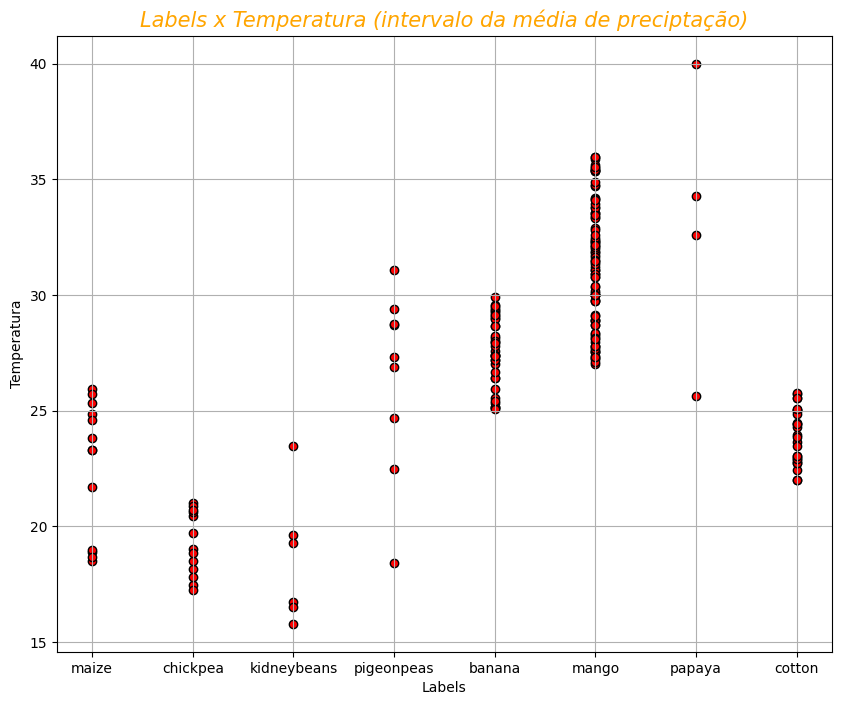

In [140]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.set_title(
    "Labels x Temperatura (intervalo da média de preciptação)",
    fontsize = 15,
    fontstyle = "italic",
    c = "orange"
    )

ax.set_xlabel("Labels")
ax.set_ylabel("Temperatura")

ax.grid(True)

ax.scatter(x = mrainfall_label, y = mrainfall_temp, c= "red", edgecolors = "k")

É possível perceber que existem lables com um intervalo bem definido de temperatura. 

### Vamos verificar se isso se dispõe para toda a base:

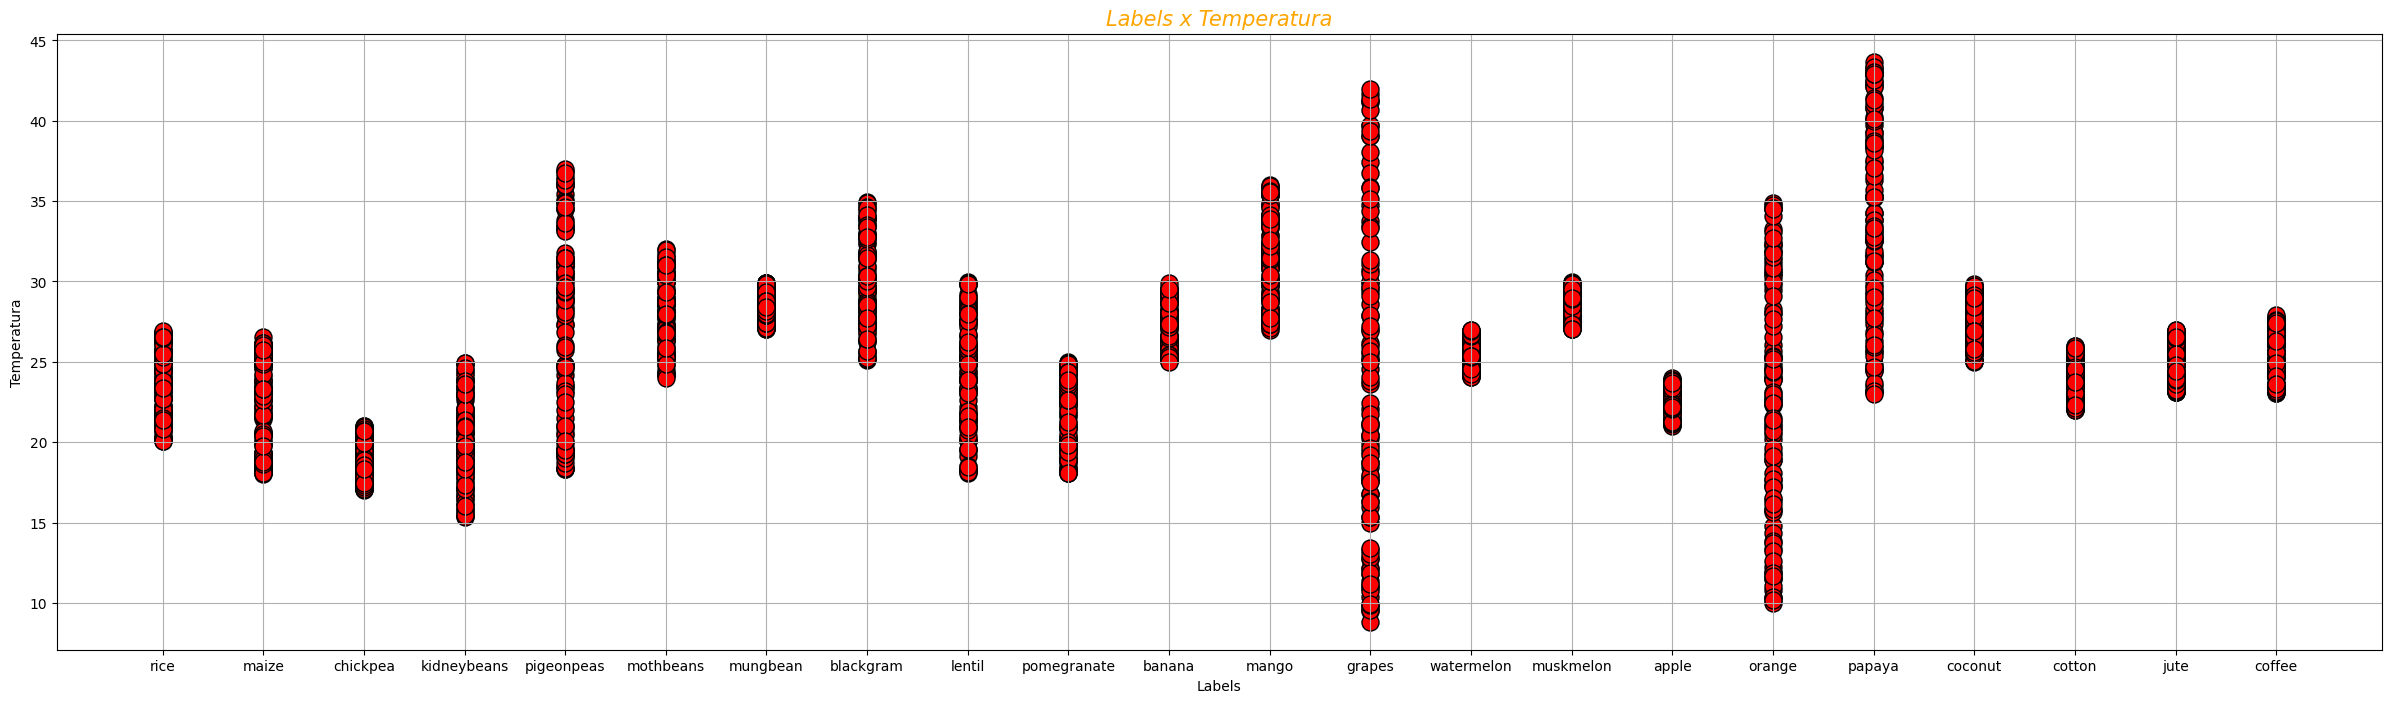

In [141]:
labels = df["label"]
temp = df["temperature"]

fig, ax = plt.subplots(figsize = (30, 8))

ax.set_title(
    "Labels x Temperatura",
    fontsize = 15,
    fontstyle = "italic",
    c = "orange"
    )

ax.set_xlabel("Labels")
ax.set_ylabel("Temperatura")

ax.grid(True)

ax.scatter(x=labels, y=temp, c= "red", s = 150, edgecolors = "k")

Vimos que todas apresentam um intervalo bem definido. Até as que se estendem por toda a faixa de temperatura possuem uma distribuição bem uniforme.

### Vamos selecionar as labels que tem uma distribuição uniforme e ver se encontramos alguma relação mais bem definida delas com algum outro parâmetro

In [142]:
labels_dist = df[(df["label"] == "grapes") | (df["label"] == "orange") | (df["label"] == "papaya") | (df["label"] == "pigeonpeas")]

labels_dist.describe()


N           P           K  temperature    humidity  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean    28.342500   68.965000   70.112500    27.020230   78.627614   
std     17.393721   42.200426   76.636694     8.555512   19.013216   
min      0.000000    5.000000    5.000000     8.825675   30.400468   
25%     14.000000   42.000000   15.000000    20.541730   77.435149   
50%     28.500000   64.000000   35.000000    27.923854   86.994867   
75%     39.000000   90.000000   90.000000    33.210571   92.066784   
max     70.000000  145.000000  205.000000    43.675493   94.964199   

               ph    rainfall  
count  400.000000  400.000000  
mean     6.394628  118.043050  
std      0.729765   48.064789  
min      4.548202   40.351531  
25%      5.928743   73.275100  
50%      6.481046  109.754267  
75%      6.841288  149.077397  
max      7.995849  248.859299

In [143]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#### Conseguimos ver que a relação entre os valores encontrados nessas lables e a tabela original chamam atenção no nível de Nitrogênio e Humidade. Vamos ver se o gráfico nos mostra algo interessante:


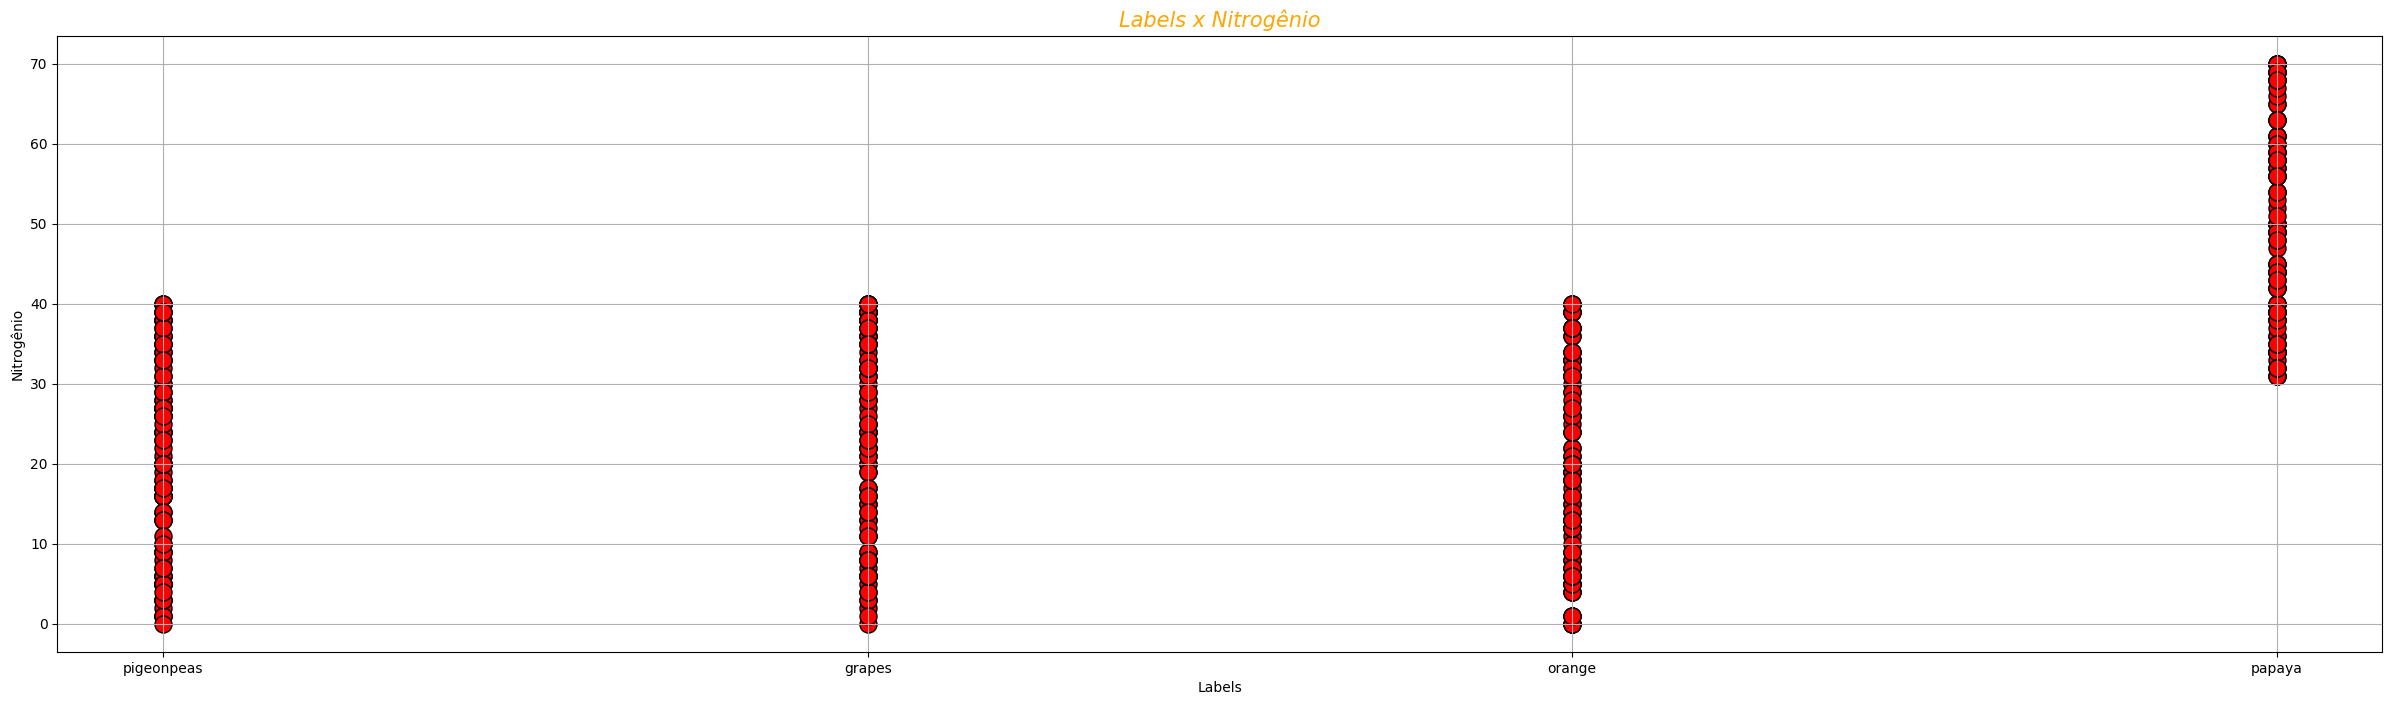

In [144]:
labels = labels_dist["label"]
nitr = labels_dist["N"]

fig, ax = plt.subplots(figsize = (30, 8))

ax.set_title(
    "Labels x Nitrogênio",
    fontsize = 15,
    fontstyle = "italic",
    c = "orange"
    )

ax.set_xlabel("Labels")
ax.set_ylabel("Nitrogênio")

ax.grid(True)

ax.scatter(x=labels, y=nitr, c= "red", s = 150, edgecolors = "k")

Vemos que os grupos agora estão mais bem definidos. Vamos ver se isso também acontece com a coluna "humidity":

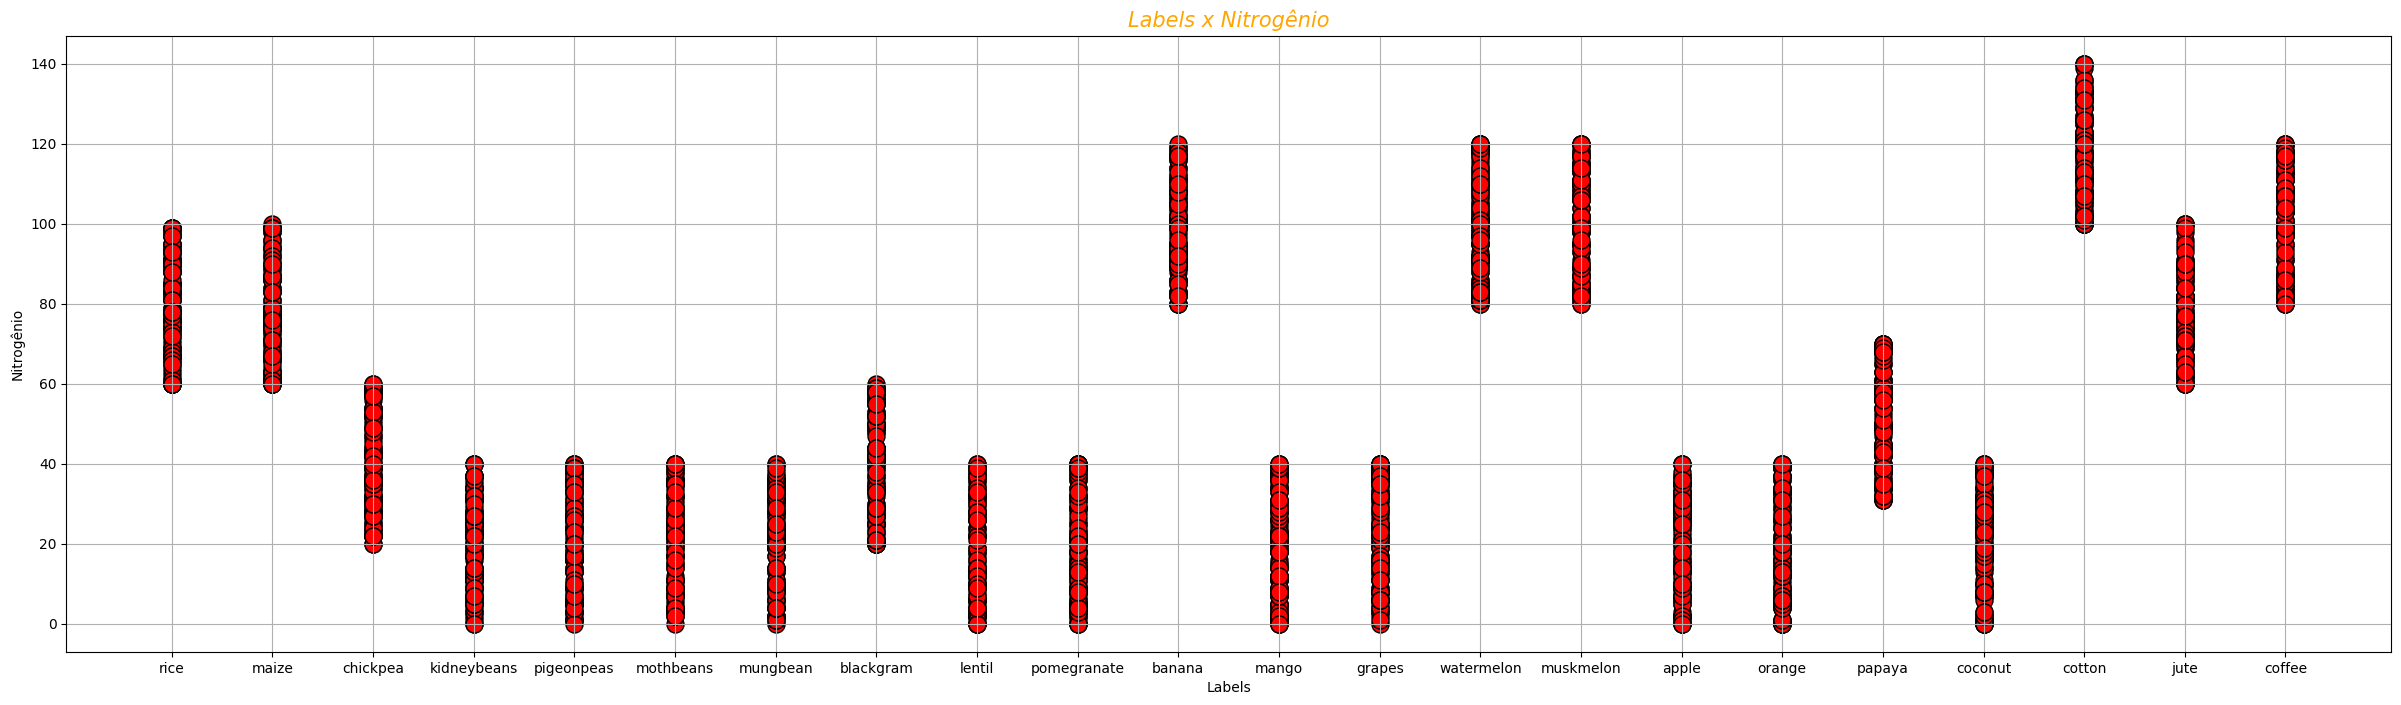

In [145]:
labels = df["label"]
nitr = df["N"]

fig, ax = plt.subplots(figsize = (30, 8))

ax.set_title(
    "Labels x Nitrogênio",
    fontsize = 15,
    fontstyle = "italic",
    c = "orange"
    )

ax.set_xlabel("Labels")
ax.set_ylabel("Nitrogênio")

ax.grid(True)

ax.scatter(x=labels, y=nitr, c= "red", s = 150, edgecolors = "k")

Vemos que o agrupamento se torna bem mais definido quando filtrado pelo Nitrogênio (todos os intervalos são de 20 unidades de medida). Vamos ver se o mesmo acontece com a humidade que nos chamou atenção também.

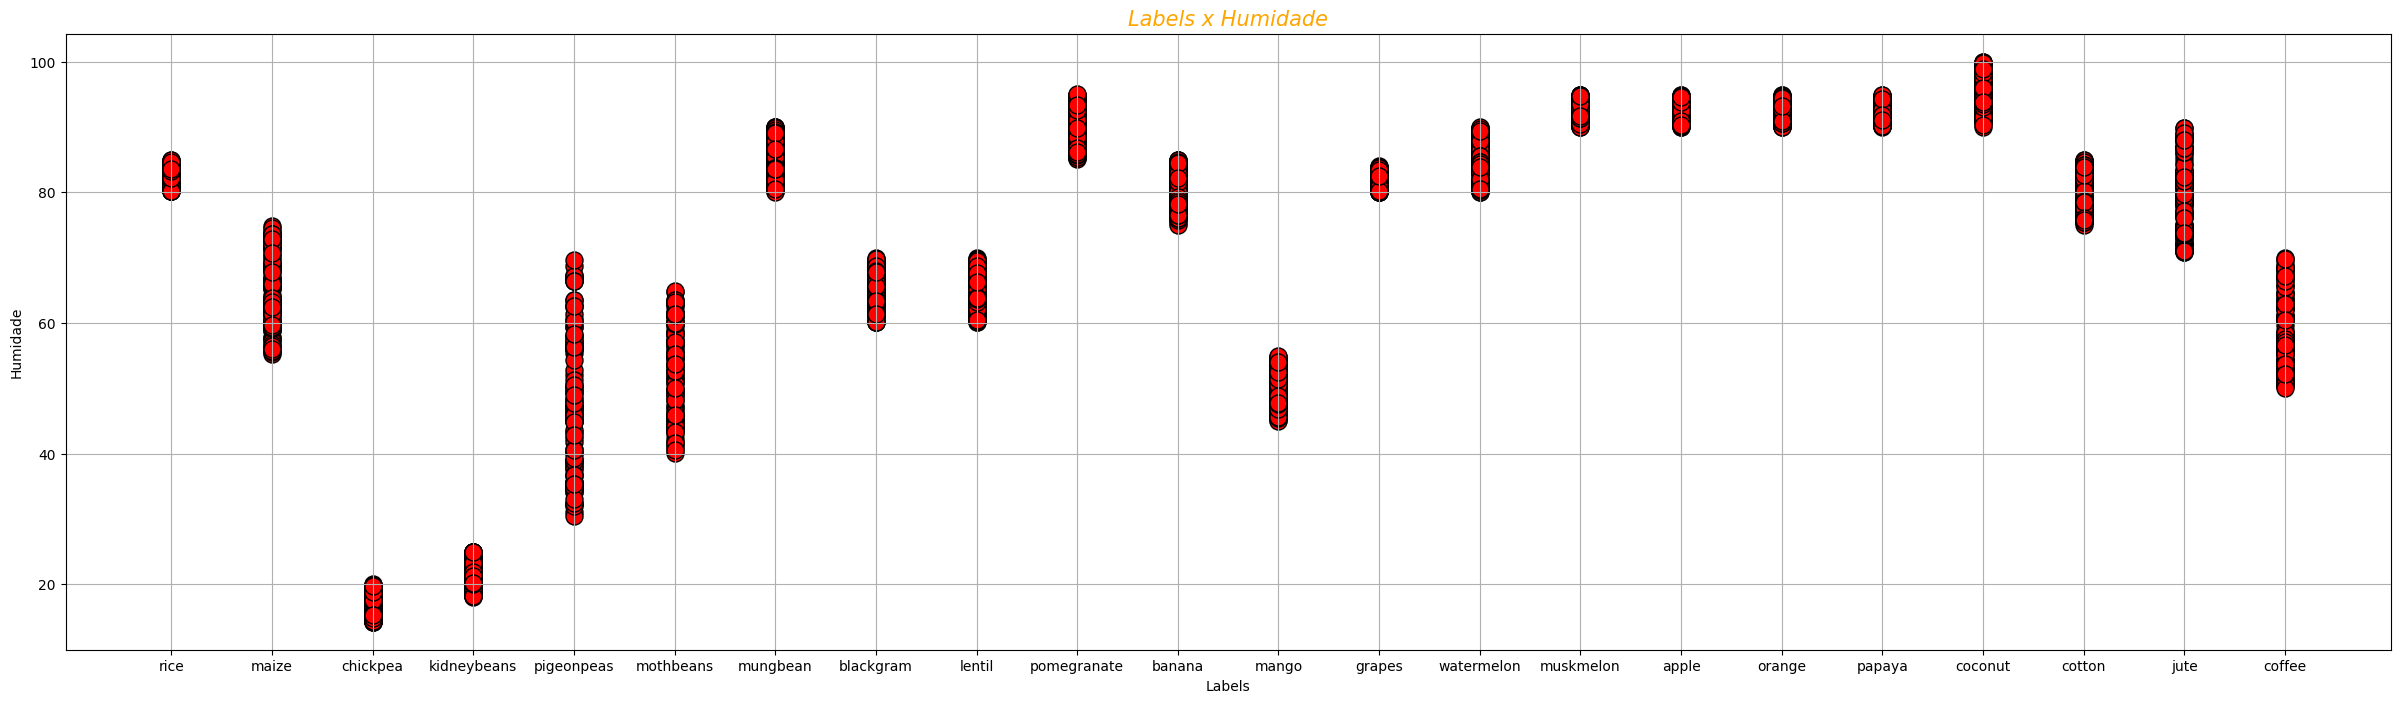

In [146]:
labels = df["label"]
hum = df["humidity"]

fig, ax = plt.subplots(figsize = (30, 8))

ax.set_title(
    "Labels x Humidade",
    fontsize = 15,
    fontstyle = "italic",
    c = "orange"
    )

ax.set_xlabel("Labels")
ax.set_ylabel("Humidade")

ax.grid(True)

ax.scatter(x=labels, y=hum, c= "red", s = 150, edgecolors = "k")

### Vamos ver se os outros paramêtros possuem uma relação bem definida como as encontradas até agora:

Text(0, 0.5, 'Preciptação')

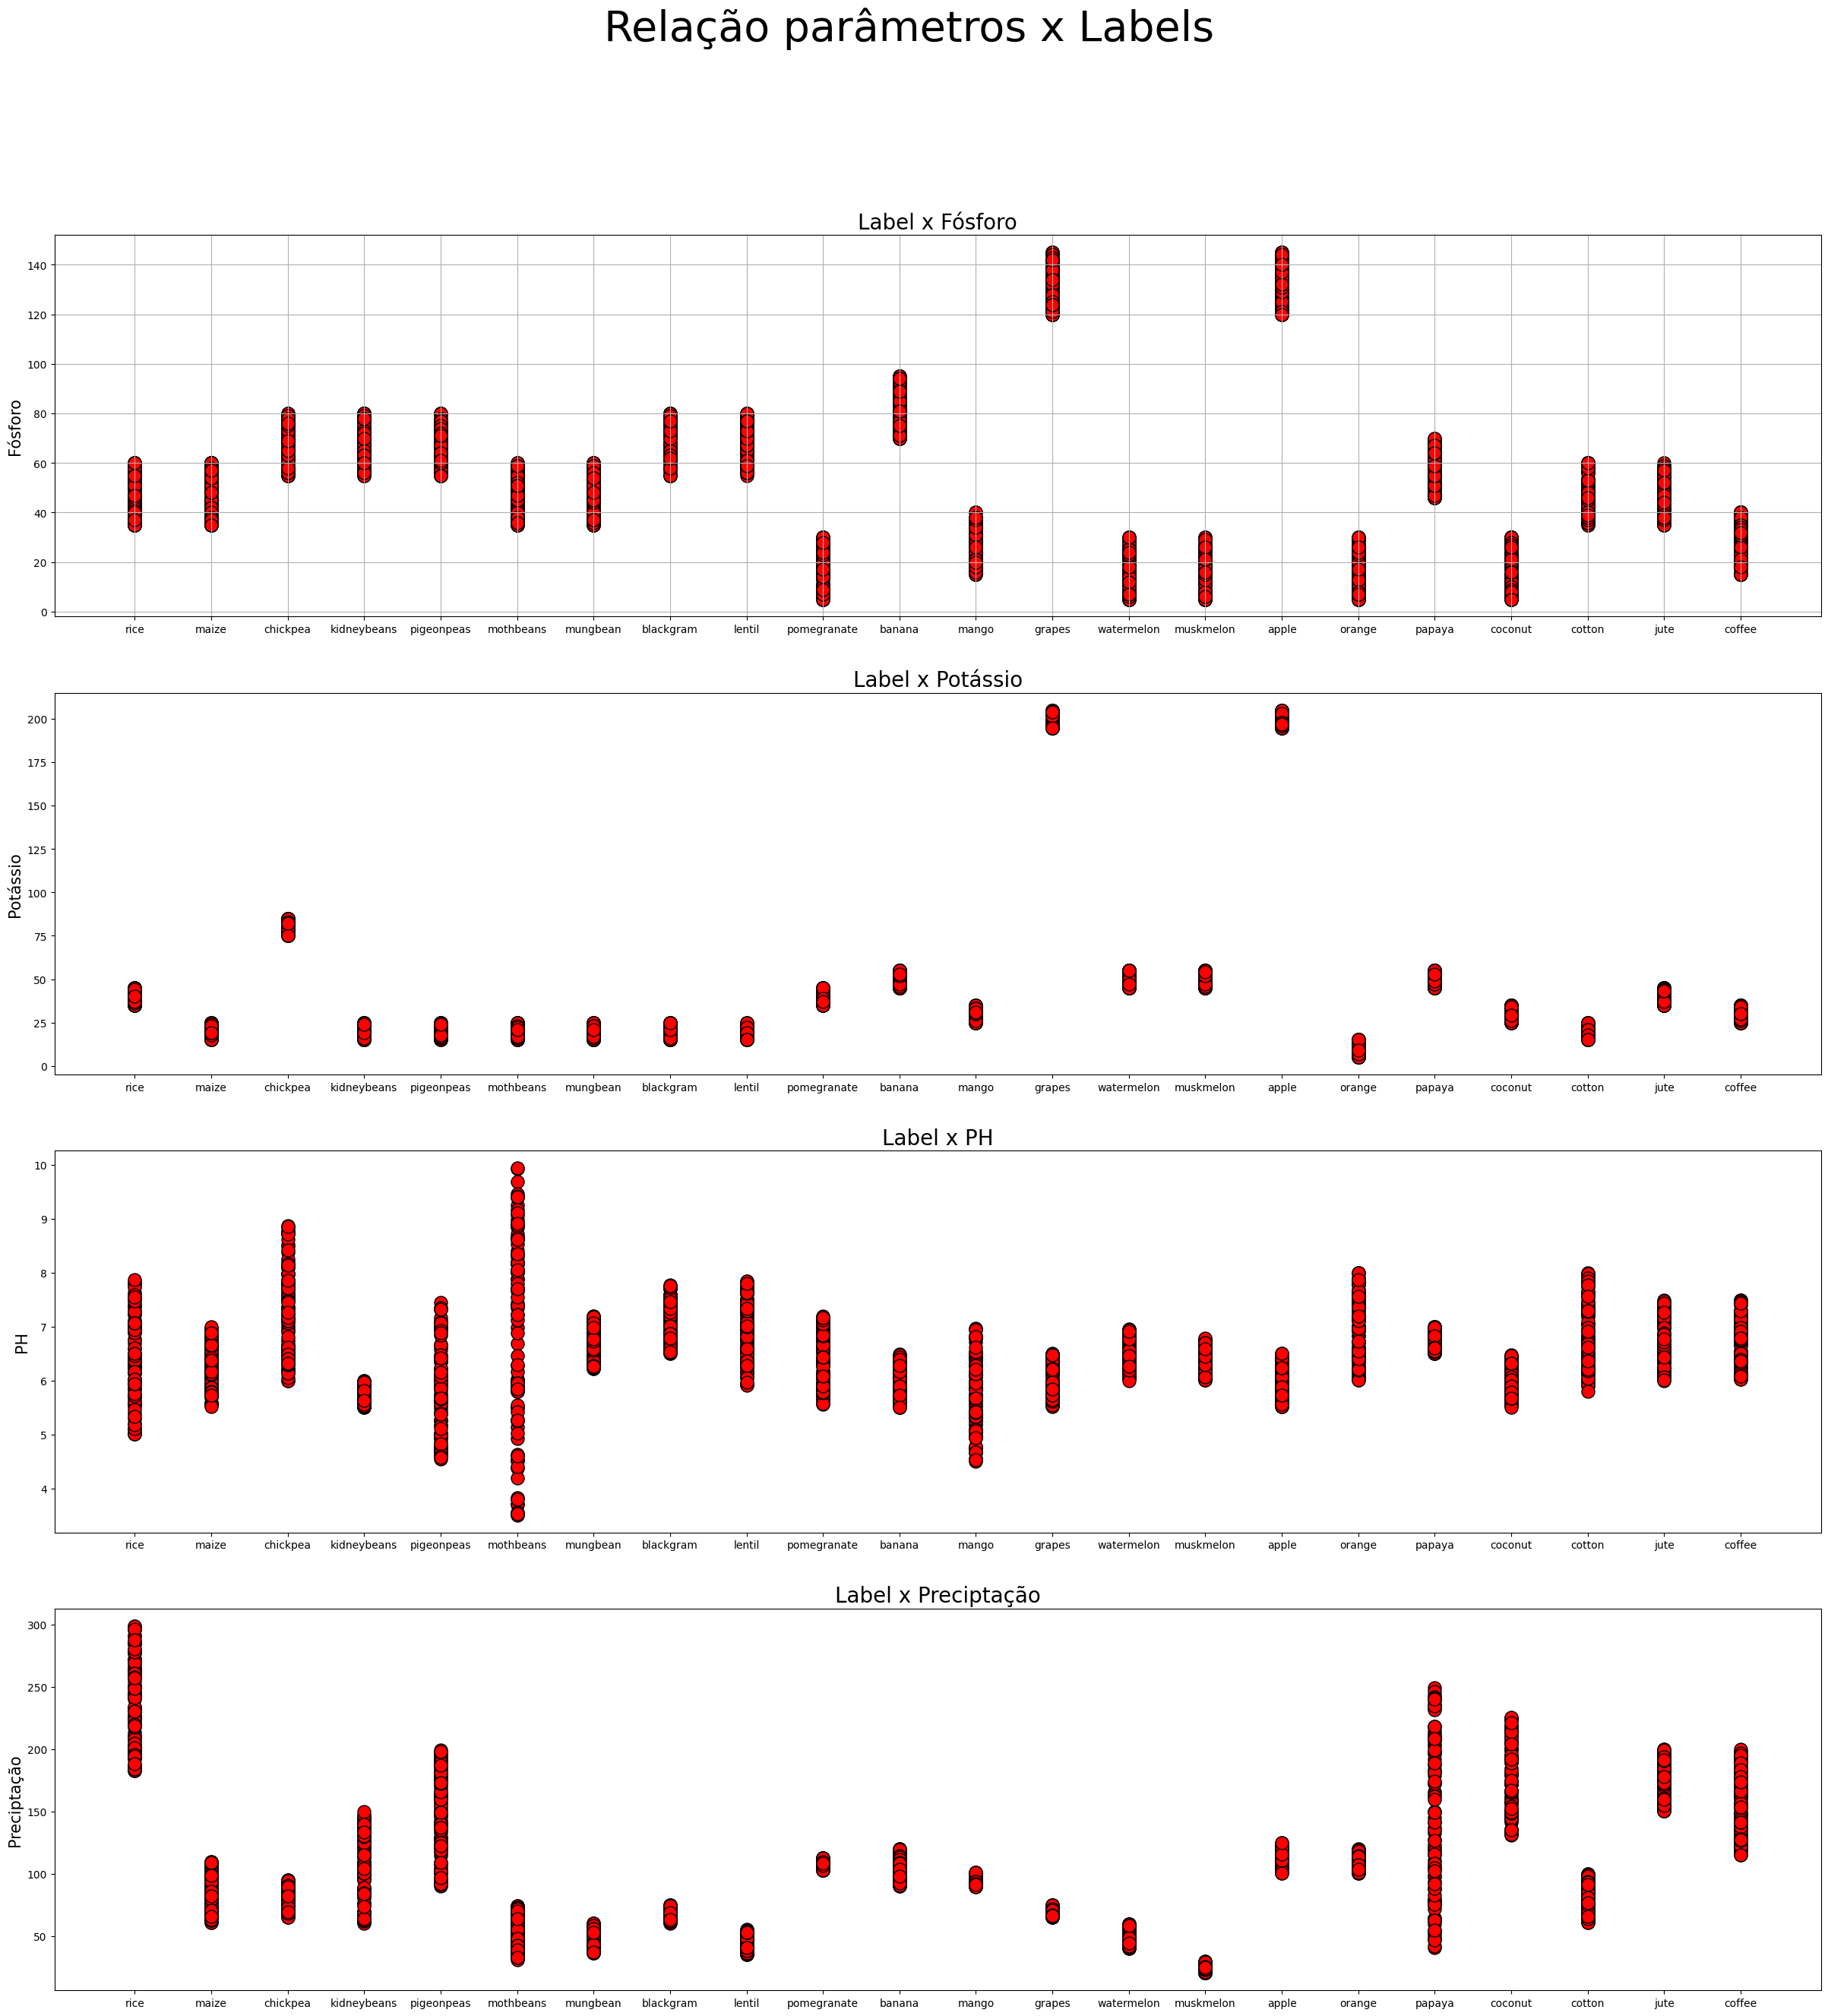

In [147]:
l = df["label"]
p = df["P"]
k = df["K"]
ph = df["ph"]
r = df["rainfall"]

fig, axs = plt.subplots(4, 1, figsize = (30, 30))

fig.suptitle(
    "Relação parâmetros x Labels",
    fontsize = 40,
    )

axs[0].scatter(x=l, y=p, c= "red", s = 150, edgecolors = "k")
axs[0].set_title("Label x Fósforo", fontsize = 20)
axs[0].set_ylabel("Fósforo", fontsize = 15)
axs[0].grid(True)

axs[1].scatter(x=l, y=k, c= "red", s = 150, edgecolors = "k")
axs[1].set_title("Label x Potássio", fontsize = 20)
axs[1].set_ylabel("Potássio", fontsize = 15)

axs[2].scatter(x=l, y=ph, c= "red", s = 150, edgecolors = "k")
axs[2].set_title("Label x PH", fontsize = 20)
axs[2].set_ylabel("PH", fontsize = 15)

axs[3].scatter(x=l, y=r, c= "red", s = 150, edgecolors = "k")
axs[3].set_title("Label x Preciptação", fontsize = 20)
axs[3].set_ylabel("Preciptação", fontsize = 15)

### Só para ficar numa melhor visualização. Vamos plotar todos os gráficos juntos:

In [148]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

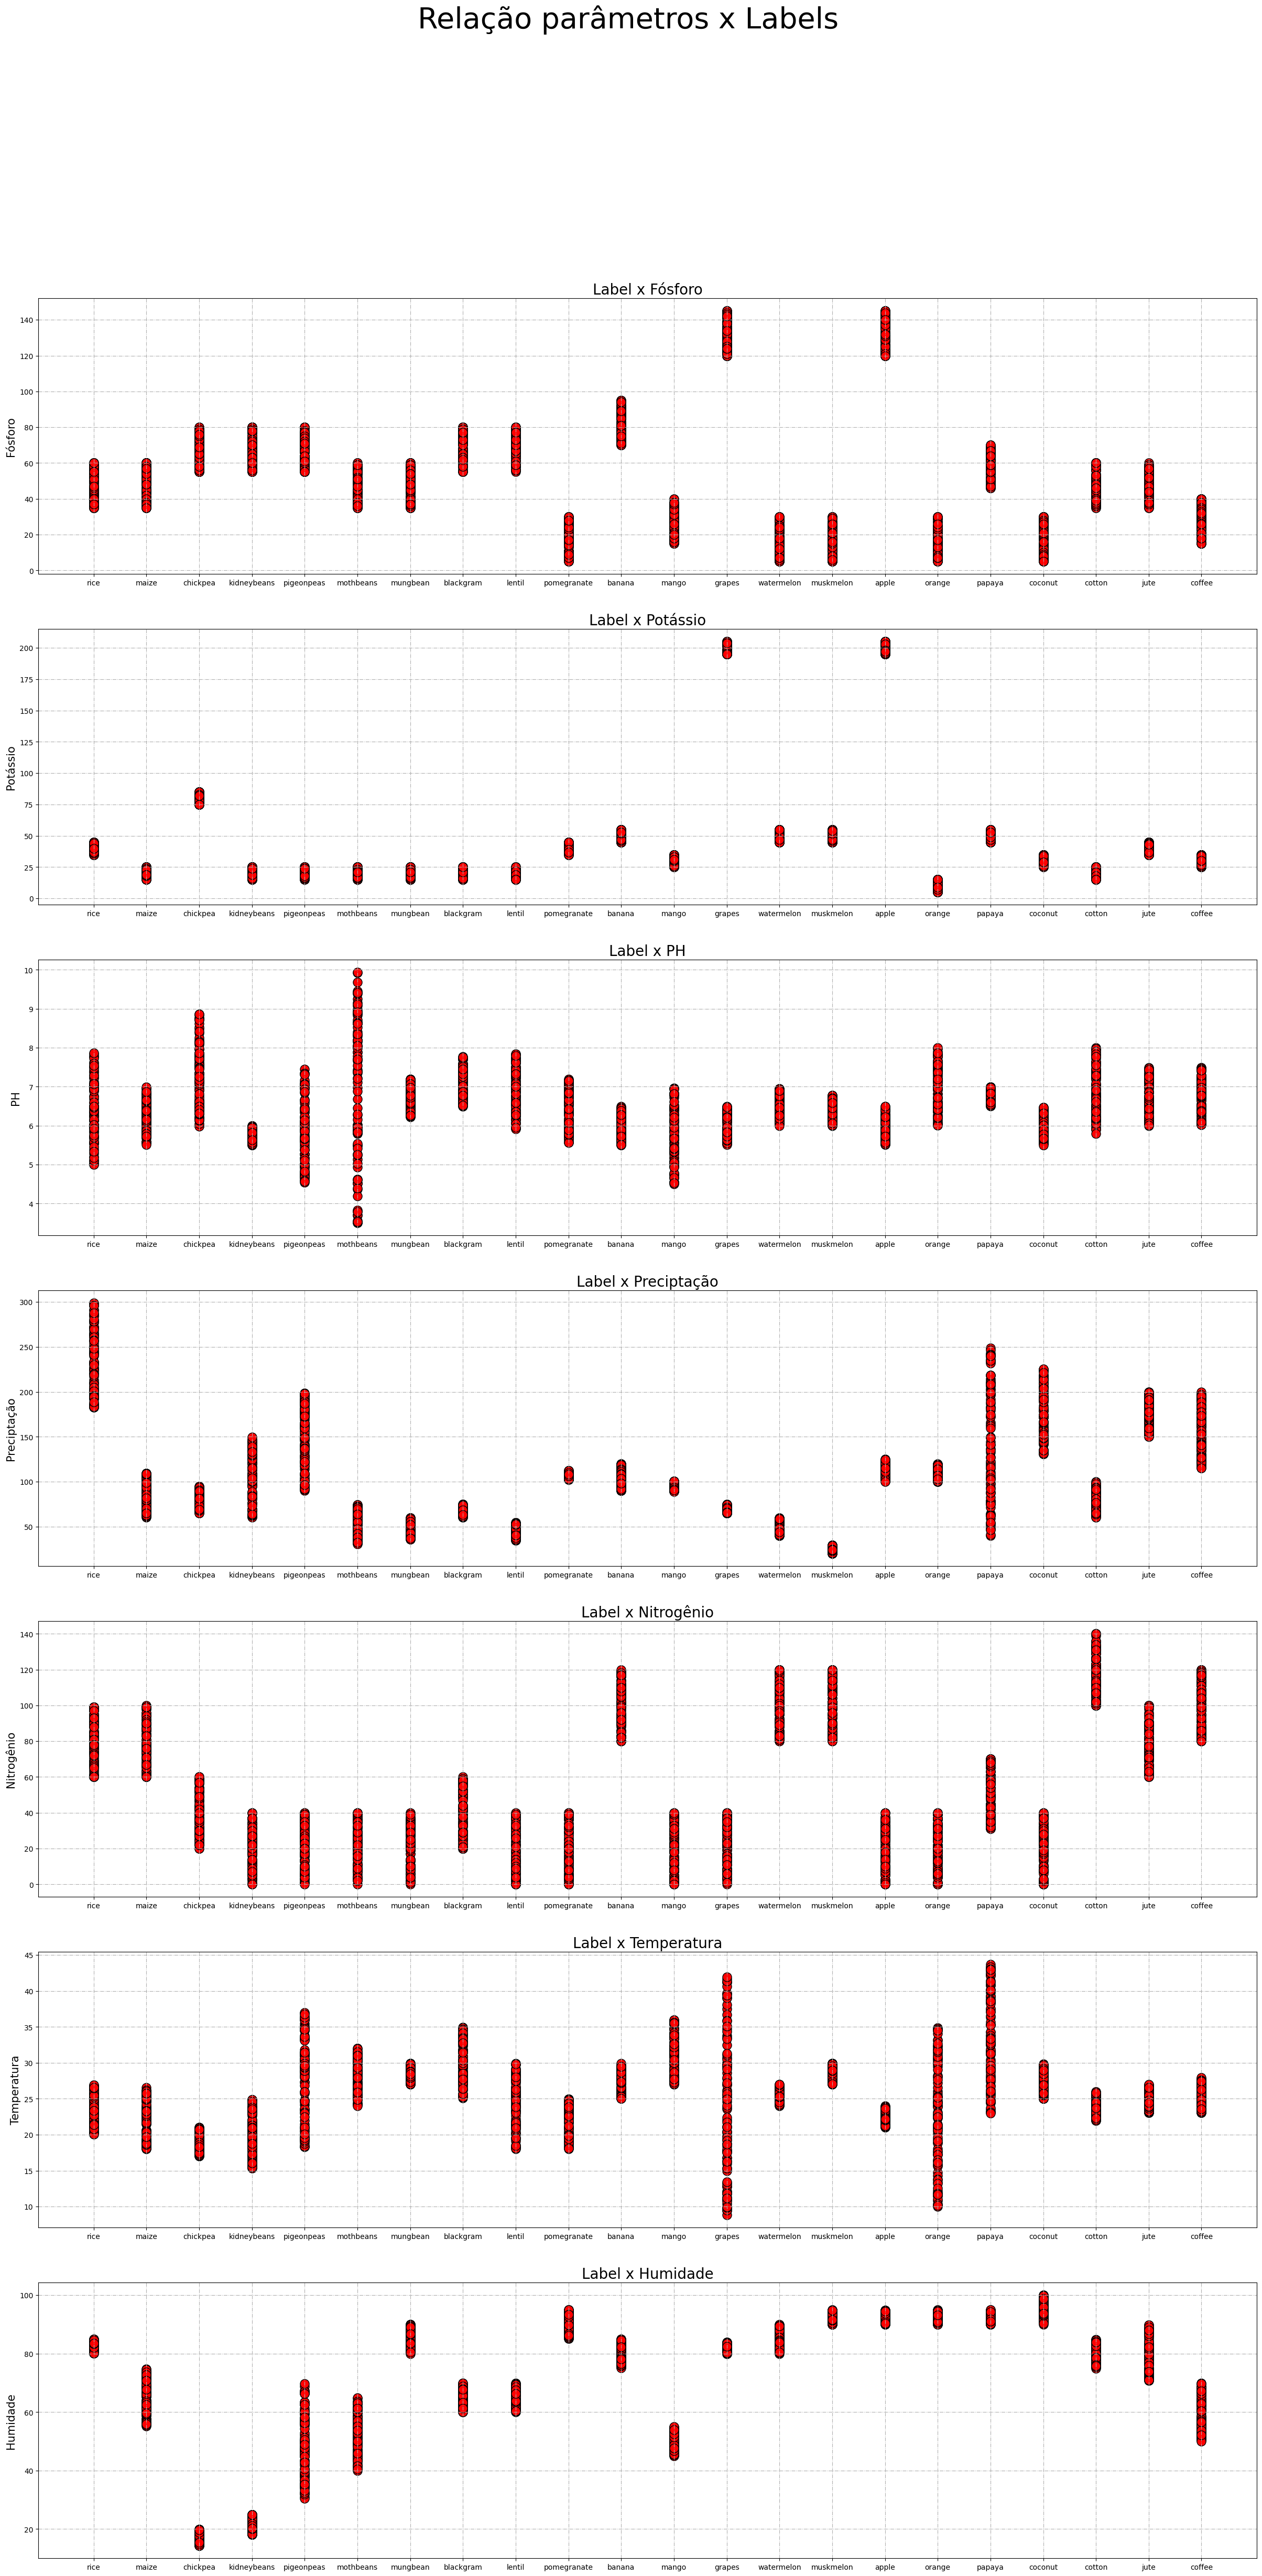

In [149]:
l = df["label"]
n = df["N"]
p = df["P"]
k = df["K"]
t = df["temperature"]
h = df["humidity"]
ph = df["ph"]
r = df["rainfall"]

fig, axs = plt.subplots(7, 1, figsize = (30, 56))

fig.suptitle(
    "Relação parâmetros x Labels",
    fontsize = 40,
    )

axs[0].scatter(x=l, y=p, c= "red", s = 150, edgecolors = "k")
axs[0].set_title("Label x Fósforo", fontsize = 20)
axs[0].set_ylabel("Fósforo", fontsize = 15)
axs[0].grid(True, linestyle = "-.")

axs[1].scatter(x=l, y=k, c= "red", s = 150, edgecolors = "k")
axs[1].set_title("Label x Potássio", fontsize = 20)
axs[1].set_ylabel("Potássio", fontsize = 15)
axs[1].grid(True, linestyle = "-.")

axs[2].scatter(x=l, y=ph, c= "red", s = 150, edgecolors = "k")
axs[2].set_title("Label x PH", fontsize = 20)
axs[2].set_ylabel("PH", fontsize = 15)
axs[2].grid(True, linestyle = "-.")

axs[3].scatter(x=l, y=r, c= "red", s = 150, edgecolors = "k")
axs[3].set_title("Label x Preciptação", fontsize = 20)
axs[3].set_ylabel("Preciptação", fontsize = 15)
axs[3].grid(True, linestyle = "-.")

axs[4].scatter(x=l, y=n, c= "red", s = 150, edgecolors = "k")
axs[4].set_title("Label x Nitrogênio", fontsize = 20)
axs[4].set_ylabel("Nitrogênio", fontsize = 15)
axs[4].grid(True, linestyle = "-.")

axs[5].scatter(x=l, y=t, c= "red", s = 150, edgecolors = "k")
axs[5].set_title("Label x Temperatura", fontsize = 20)
axs[5].set_ylabel("Temperatura", fontsize = 15)
axs[5].grid(True, linestyle = "-.")

axs[6].scatter(x=l, y=h, c= "red", s = 150, edgecolors = "k")
axs[6].set_title("Label x Humidade", fontsize = 20)
axs[6].set_ylabel("Humidade", fontsize = 15)
axs[6].grid(True, linestyle = "-.")

#Com base nos gráficos podemos ver uqe o perfil médio ideal que abrange o maior número de espécies cultivadas é o ambiente com as seguintes características:

## Fósforo - entre 20 e 80
##Potássio - entre 10 e 50
##PH - entre 5 e 9
##Precipitação - entre 50 e 200
##Nitrogenio - entre 0 e 100
##Temperatura - entre 20 e 30
##Nitrogênio - entre 40 e 100  

##Banana
- Está dentro do perfil indicado, mas possui parte de sua população em níveis mais altos de: Fósforo, Potássio e Nitrogênio.

##Mamão
- Está dentro do perfil indicado, mas possui parte de sua população em níveis mais altos de: Potássio e Temperatura.

##Manga
- Está dentro do perfil indicado.




#Clusterização

In [150]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

##Vamos descobrir quantas k classes precisamos para nossa clusterização

In [157]:
X = np.array(df.drop("label", axis=1))

clusters = range(2, 6)
  
for n_clusters in clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(X)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For no of clusters = 2  The average silhouette_score is : 0.5451227886773357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For no of clusters = 3  The average silhouette_score is : 0.4222256415004365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For no of clusters = 4  The average silhouette_score is : 0.40078616497807307


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For no of clusters = 5  The average silhouette_score is : 0.38256696191347683


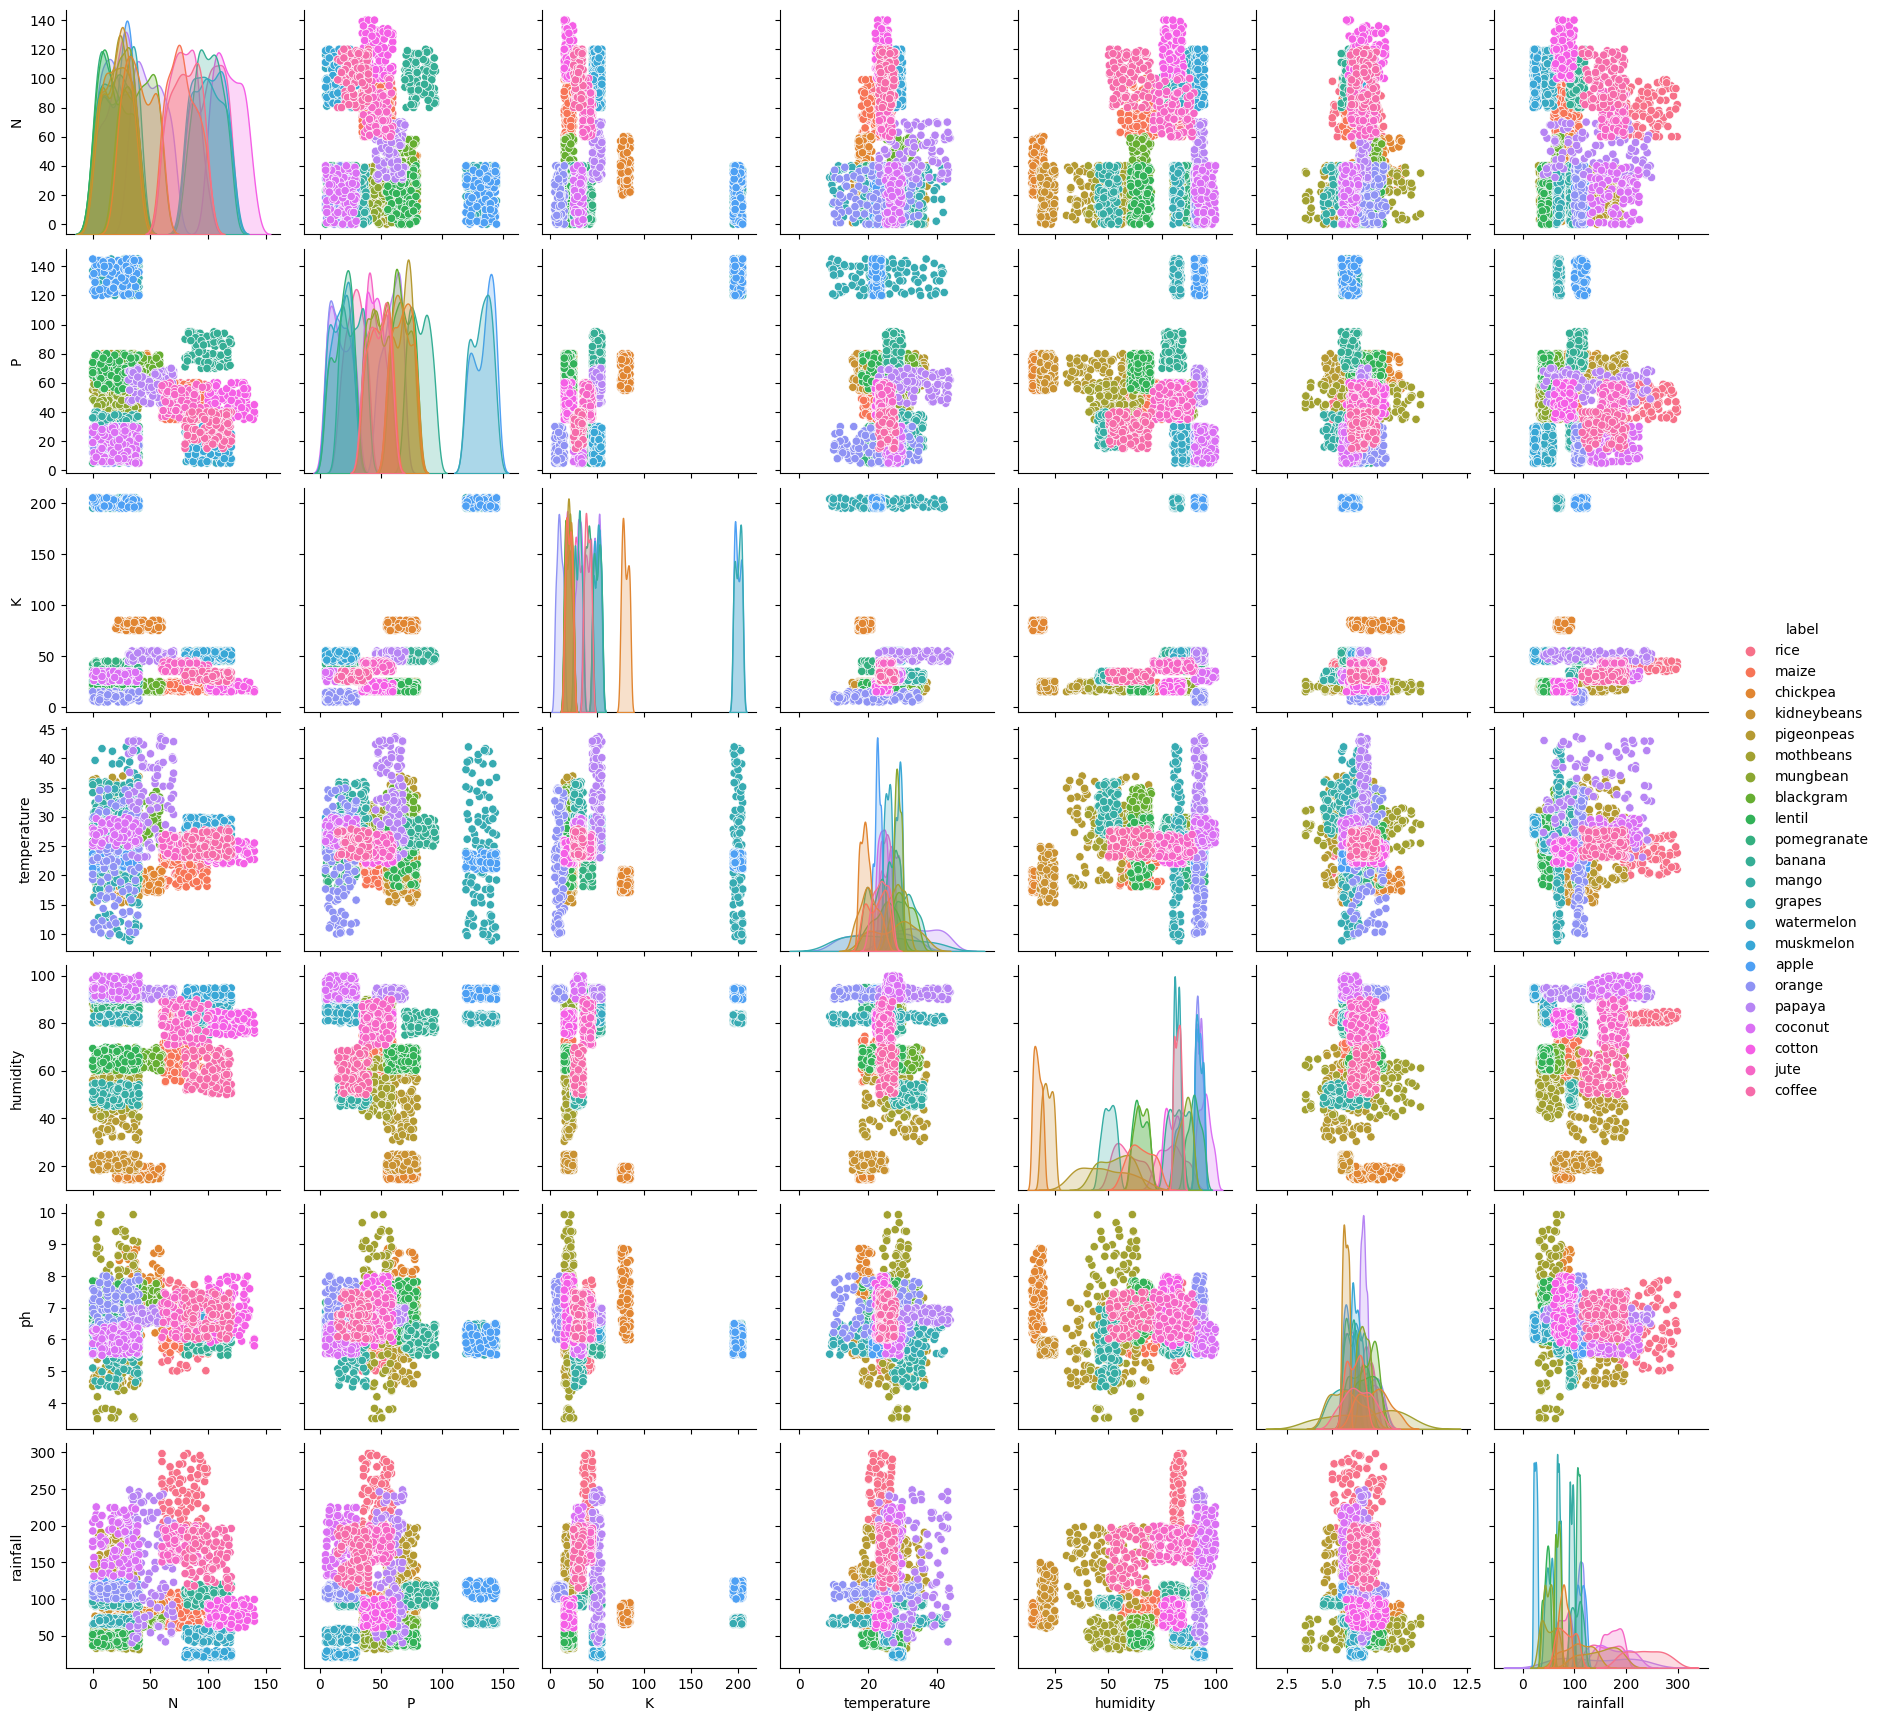

In [152]:
sb.pairplot(df, hue="label")